In [1]:
import numpy as np

def onedim_8sites_IsingModel_OBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      

def onedim_8sites_IsingModel_PBC(qc,n_qubits,dt):
    
    odd=[0,2,4,6]
    even=[1,3,5]
    for i in range(n_qubits):
        qc.rz(-2*ht*dt,i) #qc.rz(-2 * theta, i)  # Implements e^{i θ Z} to the qubit i
    qc.barrier()
    for i in odd:
        qc.cx(i,i+1)
    for i in odd:
        qc.rx(-2*J*dt,i)
    for i in odd:
        qc.cx(i,i+1)
    qc.barrier()
    for i in even:
        qc.cx(i,i+1)
    for i in even:
        qc.rx(-2*J*dt,i)
    for i in even:
        qc.cx(i,i+1)
    qc.barrier()      
    qc.cx(0,n_qubits-1)
    qc.rx(-2*J*dt,0)
    qc.cx(0,n_qubits-1)
    qc.barrier()      


In [2]:
from qiskit import QuantumCircuit, QuantumRegister 
from qiskit.quantum_info import Statevector
J=0.02
ht=1
dt=10
time_steps=0
n_qubits=8
qr=QuantumRegister(n_qubits)
qc=QuantumCircuit(qr)

qc.draw() #check that we are not "rewritting" on an used circuit


q0_0: 
      
q0_1: 
      
q0_2: 
      
q0_3: 
      
q0_4: 
      
q0_5: 
      
q0_6: 
      
q0_7:

In [3]:
"""
NumPy Simulation Data:
"""
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

from qiskit_aer.noise import pauli_error, NoiseModel

pI1 = 1 - 2*0.00002 - 0.00006# probability of no error
p1 = [pI1, 0.00002, 0.00002, 0.00006]   #Optimistic error rates for current trapped ions for 1-qubit error
pI2 = 1 - 3*0.00033 
p2 = [pI2, 0.00033, 0.00033, 0.00033]   #Optimistic error rates for near-term superconducting qubits for 2-qubit error
p_meas = 0.05
# QuantumError objects
error_meas = pauli_error([("X", p_meas), ("I", 1 - p_meas)])
error_table2 = pauli_error([("X", p1[1]), ("Y", p1[2]),("Z", p1[3]),("I", p1[0])])
error_gate2 = pauli_error([("X", p2[1]), ("Y", p2[2]),("Z", p2[3]),("I", p2[0])])
error_table3 = error_gate2.tensor(error_gate2)
 
# Add errors to noise model
noise = NoiseModel()

noise.add_all_qubit_quantum_error(error_meas, "measure")
noise.add_all_qubit_quantum_error(error_table2, ["u1", "u2", "u3","x", "sx", "rz"])
noise.add_all_qubit_quantum_error(error_table3, ["cx"])
 
print(noise)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3', 'x']
  Instructions with noise: ['sx', 'u3', 'rz', 'x', 'cx', 'measure', 'u1', 'u2']
  All-qubits errors: ['measure', 'u1', 'u2', 'u3', 'x', 'sx', 'rz', 'cx']


In [4]:
"""
Qiskit Current Trapped Ions Simulation Data:
"""
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

from qiskit_aer.noise import pauli_error, NoiseModel

pI1_trapped = 1 - 2*0.00002 - 0.00006# probability of no error
p1_trapped = [pI1_trapped, 0.00002, 0.00002, 0.00006]   #Optimistic error rates for current trapped ions for 1-qubit error
pI2_trapped = 1 - 2*0.0003 - 0.0001
p2_trapped = [pI2_trapped, 0.0001, 0.0003, 0.0003]   #Optimistic error rates for near-term superconducting qubits for 2-qubit error
p_meas = 0.05
# QuantumError objects
error_meas = pauli_error([("X", p_meas), ("I", 1 - p_meas)])
error_table2_trapped = pauli_error([("X", p1_trapped[1]), ("Y", p1_trapped[2]),("Z", p1_trapped[3]),("I", p1_trapped[0])])
error_gate2_trapped= pauli_error([("X", p2_trapped[1]), ("Y", p2_trapped[2]),("Z", p2_trapped[3]),("I", p2_trapped[0])])
error_table3_trapped = error_gate2_trapped.tensor(error_gate2_trapped)
 
# Add errors to noise model
noise_trapped = NoiseModel()

noise_trapped.add_all_qubit_quantum_error(error_meas, "measure")
noise_trapped.add_all_qubit_quantum_error(error_table2_trapped, ["u1", "u2", "u3","x", "sx", "rz"])
noise_trapped.add_all_qubit_quantum_error(error_table3_trapped, ["cx"])
 
print(noise_trapped)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3', 'x']
  Instructions with noise: ['sx', 'u3', 'rz', 'x', 'cx', 'measure', 'u1', 'u2']
  All-qubits errors: ['measure', 'u1', 'u2', 'u3', 'x', 'sx', 'rz', 'cx']


In [5]:
"""
Qiskit Near-Superconducting Simulation Data:
"""
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

from qiskit_aer.noise import pauli_error, NoiseModel

pI1_super = 1 - 3*0.00033 # probability of no error
p1_super = [pI1_super, 0.00033 ,0.00033 , 00.00033 ]   #Optimistic error rates for current trapped ions for 1-qubit error
pI2_super = 1 - 3*0.00033 
p2_super = [pI2_super, 0.00033, 0.00033, 0.00033]   #Optimistic error rates for near-term superconducting qubits for 2-qubit error
p_meas = 0.05
# QuantumError objects
error_meas = pauli_error([("X", p_meas), ("I", 1 - p_meas)])
error_table2_super = pauli_error([("X", p1_super[1]), ("Y", p1_super[2]),("Z", p1_super[3]),("I", p1_super[0])])
error_gate2_super = pauli_error([("X", p2_super[1]), ("Y", p2_super[2]),("Z", p2_super[3]),("I", p2_super[0])])
error_table3_super = error_gate2_super.tensor(error_gate2_super)
 
# Add errors to noise model
noise_super = NoiseModel()

noise_super.add_all_qubit_quantum_error(error_meas, "measure")
noise_super.add_all_qubit_quantum_error(error_table2_super, ["u1", "u2", "u3","x", "sx", "rz"])
noise_super.add_all_qubit_quantum_error(error_table3_super, ["cx"])
 
print(noise_super)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3', 'x']
  Instructions with noise: ['sx', 'u3', 'rz', 'x', 'cx', 'measure', 'u1', 'u2']
  All-qubits errors: ['measure', 'u1', 'u2', 'u3', 'x', 'sx', 'rz', 'cx']


In [6]:
#Initialize the state vector
qc.x(0)

for t in range(time_steps):
    onedim_8sites_IsingModel_OBC(qc,n_qubits,dt)
    
qc.measure_all()

In [7]:
# simulate statevector instead of measurement (ST approximation)
from qiskit_aer import AerSimulator

# ===================================
# Run in the classic simulator
# ===================================
sim = AerSimulator()
job = sim.run(qc, shots=10000)
result = job.result()
counts = result.get_counts()




In [8]:
# ===================================
# 3. Calculate the probability that each qubit is in state |1> for ST approx
# ===================================
total_shots = sum(counts.values())
prob_qubits = [0] * n_qubits

for bitstring, freq in counts.items():
    # bitstring is in orden little-endian order(q2 q1 q0)
    for i, bit in enumerate(reversed(bitstring)):
        if bit == "1":
            prob_qubits[i] += freq

# Normalizar
prob_qubits = [p / total_shots for p in prob_qubits]

print("\nProbability of each qubit being in |1>:")
for i, p in enumerate(prob_qubits):
    print(f"Qubit {i}: {p:.4f}")



Probability of each qubit being in |1>:
Qubit 0: 1.0000
Qubit 1: 0.0000
Qubit 2: 0.0000
Qubit 3: 0.0000
Qubit 4: 0.0000
Qubit 5: 0.0000
Qubit 6: 0.0000
Qubit 7: 0.0000


In [9]:
#NumPy (Noise) implementation 
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

shots = 10000
sim_noise = AerSimulator(noise_model=noise, shots = shots)
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(
    optimization_level=3, backend=sim_noise
)
qc_noise = passmanager.run(qc)
job_noise = sim_noise.run(qc_noise)
result_noise = job_noise.result()
counts_noise = result_noise.get_counts()


In [10]:
#Qiskit current trapped ions (Noise) implementation 
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

shots = 10000
sim_noise_trapped = AerSimulator(noise_model=noise_trapped, shots = shots)
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(
    optimization_level=3, backend=sim_noise_trapped
)
qc_noise_trapped = passmanager.run(qc)
job_noise_trapped = sim_noise_trapped.run(qc_noise_trapped)
result_noise_trapped = job_noise_trapped.result()
counts_noise_trapped = result_noise_trapped.get_counts()


In [11]:
#Qiskit near term superconducting (Noise) implementation 
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

shots = 10000
sim_noise_super = AerSimulator(noise_model=noise_super, shots = shots)
# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(
    optimization_level=3, backend=sim_noise_super
)
qc_noise_super = passmanager.run(qc)
job_noise_super = sim_noise_super.run(qc_noise_super)
result_noise_super = job_noise_super.result()
counts_noise_super = result_noise_super.get_counts()


In [12]:
# ===================================
# Calculate the probability that each qubit is in state |1> for NumPy approx
# ===================================
total_shots_noise = sum(counts_noise.values())
prob_qubits_noise = [0] * n_qubits

for bitstring, freq in counts_noise.items():
    # bitstring está en orden little-endian (q2 q1 q0)
    for i, bit in enumerate(reversed(bitstring)):
        if bit == "1":
            prob_qubits_noise[i] += freq

# Normalizar
prob_qubits_noise = [p / total_shots_noise for p in prob_qubits_noise]

print("\nProbability of each qubit being in |1>:")
for i, p in enumerate(prob_qubits_noise):
    print(f"Qubit {i}: {p:.4f}")



Probability of each qubit being in |1>:
Qubit 0: 0.9509
Qubit 1: 0.0500
Qubit 2: 0.0472
Qubit 3: 0.0493
Qubit 4: 0.0476
Qubit 5: 0.0460
Qubit 6: 0.0483
Qubit 7: 0.0463


In [13]:
# ===================================
# Calculate the probability that each qubit is in state |1> for Trapped Ions
# ===================================
total_shots_noise_trapped = sum(counts_noise_trapped.values())
prob_qubits_noise_trapped = [0] * n_qubits

for bitstring, freq in counts_noise_trapped.items():
    # bitstring está en orden little-endian (q2 q1 q0)
    for i, bit in enumerate(reversed(bitstring)):
        if bit == "1":
            prob_qubits_noise_trapped[i] += freq

# Normalizar
prob_qubits_noise_trapped = [p / total_shots_noise_trapped for p in prob_qubits_noise_trapped]

print("\nProbability of each qubit being in |1>:")
for i, p in enumerate(prob_qubits_noise_trapped):
    print(f"Qubit {i}: {p:.4f}")



Probability of each qubit being in |1>:
Qubit 0: 0.9483
Qubit 1: 0.0489
Qubit 2: 0.0492
Qubit 3: 0.0487
Qubit 4: 0.0517
Qubit 5: 0.0527
Qubit 6: 0.0503
Qubit 7: 0.0491


In [14]:
# ===================================
# Calculate the probability that each qubit is in state |1> for Superconducting
# ===================================
total_shots_noise_super = sum(counts_noise_super.values())
prob_qubits_noise_super = [0] * n_qubits

for bitstring, freq in counts_noise_super.items():
    # bitstring está en orden little-endian (q2 q1 q0)
    for i, bit in enumerate(reversed(bitstring)):
        if bit == "1":
            prob_qubits_noise_super[i] += freq

# Normalizar
prob_qubits_noise_super = [p / total_shots_noise_super for p in prob_qubits_noise_super]

print("\nProbability of each qubit being in |1>:")
for i, p in enumerate(prob_qubits_noise_super):
    print(f"Qubit {i}: {p:.4f}")



Probability of each qubit being in |1>:
Qubit 0: 0.9493
Qubit 1: 0.0499
Qubit 2: 0.0497
Qubit 3: 0.0474
Qubit 4: 0.0535
Qubit 5: 0.0533
Qubit 6: 0.0459
Qubit 7: 0.0513


In [15]:
#ibm_torino prob 
prob_qubits_ibm = {
    "A": [0.9923,0.0017,0.0003,0.0026,0.004,0.001,0.0014,0.003],
    "B": [0.1388, 0.4031, 0.4138, 0.2136, 0.1042, 0.0804, 0.0702, 0.0777],
    "C": [0.1664,0.1821,0.1613,0.2133,0.3521,0.283,0.1891,0.1379],
    "D": [0.1342,0.1485,0.1467,0.1684,0.1611,0.1507,0.165,0.5559],
    "E": [0.1649,0.192,0.2088,0.2311,0.2224,0.2429,0.3953,0.235],
    "F": [0.2085,0.2605,0.2838,0.297,0.269,0.2406,0.2186,0.2153],
    "G": [0.4027,0.2498,0.2697,0.2276,0.2456,0.2312,0.2352,0.213]
}

serie = "A"   # 🔹 change only this letter (A-G)
prob_qubits_ibm_sel = prob_qubits_ibm[serie]


In [16]:
#Exact diagonalization

# === 1. only load the second column (probabilities) ===
ruta_csv = r"C:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Default Dataset for Exact Results\FIG9\fig9a1.csv"

y_exact = np.loadtxt(
    ruta_csv,
    delimiter=";",
    usecols=1,   # only the second column
    converters={1: lambda s: float(s.replace(",", "."))}
)



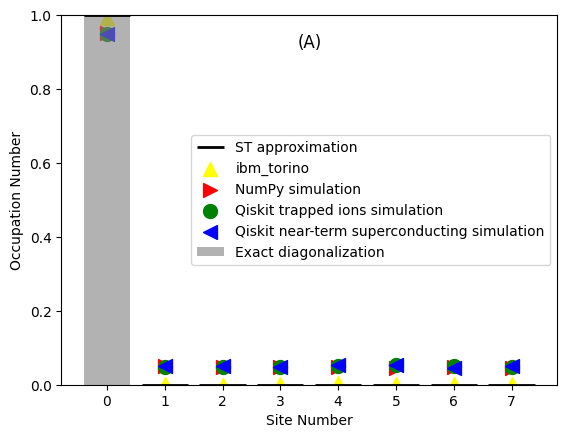

In [17]:
import matplotlib.pyplot as plt
#plt.bar(range(n_qubits), probs) this is for plotting bars (in the paper are used for representing the exact diagonalization case)
for i, p in enumerate(prob_qubits):
    # Only the first point has a label (so that it is not repeated in the legend).
    if i == 0:
        plt.hlines(y=p, xmin=i-0.4, xmax=i+0.4, colors='black', linewidth=2, label="ST approximation")
    else:
        plt.hlines(y=p, xmin=i-0.4, xmax=i+0.4, colors='black', linewidth=2)

for i, p in enumerate(prob_qubits_ibm_sel):
    if i == 0:
        plt.scatter(i, p, color="yellow", marker="^", s=100, label="ibm_torino")
    else:
        plt.scatter(i, p, color="yellow", marker="^", s=100)

for i, p in enumerate(prob_qubits_noise):
    if i == 0:
        plt.scatter(i, p, color="red", marker=">", s=100, label="NumPy simulation")
    else:
        plt.scatter(i, p, color="red", marker=">", s=100)
for i, p in enumerate(prob_qubits_noise_trapped):
    if i == 0:
        plt.scatter(i, p, color="green", marker="o", s=100, label="Qiskit trapped ions simulation")
    else:
        plt.scatter(i, p, color="green", marker="o", s=100)
for i, p in enumerate(prob_qubits_noise_super):
    if i == 0:
        plt.scatter(i, p, color="blue", marker="<", s=100, label="Qiskit near-term superconducting simulation")
    else:
        plt.scatter(i, p, color="blue", marker="<", s=100)
# === 3. Añadir datos del CSV (exact diagonalization) ===
for i, p in enumerate(y_exact):
    if i == 0:
        plt.bar(i, p, color='gray', label="Exact diagonalization", alpha=0.6)
    else:
        plt.bar(i, p, color='gray', alpha=0.6)

plt.text(
    x=0.5, y=0.95, s="("+serie+")", 
    ha='center', va='top', transform=plt.gca().transAxes, fontsize=12
)
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.ylabel("Occupation Number")
plt.legend()
plt.show()

In [18]:
import os
import json
import matplotlib.pyplot as plt

#  Folder where files are stored
save_dir = r"C:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Fig9TODO\Fig9a)"
os.makedirs(save_dir, exist_ok=True)

# Base name of the files
base_filename = os.path.join(save_dir, f"Fig9a)_{serie}_Qiskit_exact_ST_ibmtorino_NumPy")

# Save data in JSON
data_to_save = {
    "prob_qubits_ST": prob_qubits,
    f"prob_qubits_ibm": prob_qubits_ibm_sel,
    "prob_qubits_NumPy": prob_qubits_noise,
    "exact_diagonalization": y_exact.tolist(),
    "prob_qubits_current_trapped_ions": prob_qubits_noise_trapped,
    "prob_qubits_nearterm_superconducting": prob_qubits_noise_super,
}
with open(base_filename + ".json", "w") as f:
    json.dump(data_to_save, f, indent=4)

# Generate and save the figure
plt.figure()
for i, p in enumerate(prob_qubits):
    # only the first point has a label (so that it is not repeated in the legend)
    if i == 0:
        plt.hlines(y=p, xmin=i-0.4, xmax=i+0.4, colors='black', linewidth=2, label="ST approximation")
    else:
        plt.hlines(y=p, xmin=i-0.4, xmax=i+0.4, colors='black', linewidth=2)

for i, p in enumerate(prob_qubits_ibm_sel):
    if i == 0:
        plt.scatter(i, p, color="yellow", marker="^", s=100, label="ibm_torino")
    else:
        plt.scatter(i, p, color="yellow", marker="^", s=100)

for i, p in enumerate(prob_qubits_noise):
    if i == 0:
        plt.scatter(i, p, color="red", marker=">", s=100, label="NumPy simulation")
    else:
        plt.scatter(i, p, color="red", marker=">", s=100)
for i, p in enumerate(prob_qubits_noise_trapped):
    if i == 0:
        plt.scatter(i, p, color="green", marker="o", s=100, label="Qiskit trapped ions simulation")
    else:
        plt.scatter(i, p, color="green", marker="o", s=100)
for i, p in enumerate(prob_qubits_noise_super):
    if i == 0:
        plt.scatter(i, p, color="blue", marker="<", s=100, label="Qiskit near-term superconducting simulation")
    else:
        plt.scatter(i, p, color="blue", marker="<", s=100)
# === 3. Añadir datos del CSV (exact diagonalization) ===
for i, p in enumerate(y_exact):
    if i == 0:
        plt.bar(i, p, color='gray', label="Exact diagonalization", alpha=0.6)
    else:
        plt.bar(i, p, color='gray', alpha=0.6)
plt.text(
    x=0.5, y=0.95, s="("+serie+")", 
    ha='center', va='top', transform=plt.gca().transAxes, fontsize=12
)
plt.ylim(0, 1)
plt.xlabel("Site Number")
plt.ylabel("Occupation Number")
plt.legend()
plt.savefig(base_filename + ".png")
plt.close()

print(" Data stored in:", base_filename + ".json")
print(" Image stored in:", base_filename + ".png")

 Data stored in: C:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Fig9TODO\Fig9a)\Fig9a)_A_Qiskit_exact_ST_ibmtorino_NumPy.json
 Image stored in: C:\Users\pablo\OneDrive\Escritorio\Universidad\TFG\Fig9TODO\Fig9a)\Fig9a)_A_Qiskit_exact_ST_ibmtorino_NumPy.png
